In [ ]:
# Import needed libraries. E.g., pandas, missingno, and sklearn

import pandas as pd 
import numpy as np 
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

#to be able to display multiple outputs while having one code cell ,i will use the next two code lines 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('../input/dataset/Dataset.csv') # upload and read the data


In [ ]:
data

,MOB_NUM_,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G
0,1015_087236_04_22,d,DELTA,11,0.00,57,0.00,4G,Samsung,Y,Core,Y,Y,Y,0.00,6.58,93.42,0.00,100.00,0.00
1,1017_303098_08_21,p,UPPER EGYPT,0,0.01,288,0.02,2G,HMD Global Oy,N,Core,Y,Y,Y,0.00,0.00,0.00,100.00,0.00,0.00
2,1015_082942_08_21,d,ALEXANDRIA,16,0.08,87,0.00,4G,Xiaomi Communications Co Ltd,Y,Core,Y,Y,Y,0.00,0.00,0.00,4.88,95.12,0.00
3,1015_162600_04_22,d,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,Med-High,N,N,N,0.82,99.18,0.00,34.29,65.71,0.00
4,1017_114947_12_21,p,CANAL,2,0.04,182,0.30,4G,INFINIX TECHNOLOGY LIMITED,N,Med-Low,Y,Y,Y,0.00,0.03,99.97,0.56,99.44,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312665,1018_292846_10_21,d,GIZA,0,0.18,290,0.00,4G,Realme Chongqing Mobile Telecommunications Cor...,N,NaN,NaN,N,N,0.00,0.00,100.00,19.54,80.46,0.00
312666,1038_515305_07_21,d,DELTA,75,0.07,1240,0.01,3G,Samsung Korea,N,NaN,NaN,N,N,0.23,99.77,0.00,7.61,92.39,0.00
312667,1020_616172_11_21,d,DELTA,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,NaN,N,N,3.47,27.55,68.98,23.14,76.86,0.00
312668,1015_005203_06_21,d,DELTA,78,0.04,1813,0.54,NaN,NaN,NaN,NaN,NaN,N,N,1.00,24.22,74.78,8.53,85.82,5.65


In [ ]:
data=data.set_index('MOB_NUM_')

In [ ]:
data.head() # see the first 5 rows of the data
print(data.dtypes) # see the data types 
data.info() # see the needed information about our data ex: the non_null counts , col names and types 
data.shape #  see the shape of our_data
data.describe() # checking the scale of the data

,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G
MOB_NUM_,,,,,,,,,,,,,,,,,,,
1015_087236_04_22,d,DELTA,11,0.00,57,0.00,4G,Samsung,Y,Core,Y,Y,Y,0.00,6.58,93.42,0.00,100.00,0.0
1017_303098_08_21,p,UPPER EGYPT,0,0.01,288,0.02,2G,HMD Global Oy,N,Core,Y,Y,Y,0.00,0.00,0.00,100.00,0.00,0.0
1015_082942_08_21,d,ALEXANDRIA,16,0.08,87,0.00,4G,Xiaomi Communications Co Ltd,Y,Core,Y,Y,Y,0.00,0.00,0.00,4.88,95.12,0.0
1015_162600_04_22,d,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,Med-High,N,N,N,0.82,99.18,0.00,34.29,65.71,0.0
1017_114947_12_21,p,CANAL,2,0.04,182,0.30,4G,INFINIX TECHNOLOGY LIMITED,N,Med-Low,Y,Y,Y,0.00,0.03,99.97,0.56,99.44,0.0


LABEL            object
REG              object
MCK               int64
LCR             float64
LU                int64
PP              float64
USER_NETWORK     object
MANUFACTURE      object
HS_VOLTE         object
CUST_CAT         object
SIM_TYPE         object
PROV_4G          object
PROV_VOLTE       object
D2G             float64
D3G             float64
D4G             float64
V2G             float64
V3G             float64
V4G             float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 312670 entries, 1015_087236_04_22 to 1156_142222_06_21
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LABEL         312670 non-null  object 
 1   REG           312670 non-null  object 
 2   MCK           312670 non-null  int64  
 3   LCR           312670 non-null  float64
 4   LU            312670 non-null  int64  
 5   PP            312670 non-null  float64
 6   USER_NETWORK  279655 non-null  object 
 

(312670, 19)

,MCK,LCR,LU,PP,D2G,D3G,D4G,V2G,V3G,V4G
count,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000,312670.000000
mean,21.151777,0.170599,727.964154,0.116659,2.952059,20.669018,55.766120,24.568416,61.294552,13.492539
std,51.040531,0.183354,2119.555845,0.148237,14.289194,33.231844,43.897337,32.971676,38.555938,30.709106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.040000,209.000000,0.000000,0.000000,0.000000,0.000000,2.840000,14.400000,0.000000
50%,8.000000,0.110000,409.000000,0.070000,0.000000,4.270000,80.420000,9.660000,80.860000,0.000000
75%,24.000000,0.230000,829.000000,0.170000,0.240000,20.920000,96.080000,27.710000,93.910000,0.000000
max,9542.000000,1.000000,358607.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
#Converting Datatype Variables:
#first  object columns
print(data.select_dtypes(['object']).columns)



Index(['LABEL', 'REG', 'USER_NETWORK', 'MANUFACTURE', 'HS_VOLTE', 'CUST_CAT',
       'SIM_TYPE', 'PROV_4G', 'PROV_VOLTE'],
      dtype='object')


#Handling numerical Outlier

In [ ]:
# calculate Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G
MOB_NUM_,,,,,,,,,,,,,,,,,,,
1017_303098_08_21,p,UPPER EGYPT,0,0.01,288,0.02,2G,HMD Global Oy,N,Core,Y,Y,Y,0.00,0.00,0.00,100.00,0.00,0.00
1015_162600_04_22,d,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,Med-High,N,N,N,0.82,99.18,0.00,34.29,65.71,0.00
1015_028736_07_21,d,DELTA,18,0.29,1808,0.19,4G,Huawei Device Company Limited,Y,Core,Y,Y,Y,0.12,7.45,92.43,8.24,91.76,0.00
1015_120853_06_21,d,CAIRO,21,0.04,4155,0.77,4G,Guangdong Oppo Mobile Telecommunications Corp Ltd,N,NaN,Y,Y,Y,0.17,10.57,89.26,1.26,12.82,85.92
1016_783413_05_22,p,GIZA,17,0.17,29,0.00,4G,Apple,Y,Med-High,Y,Y,Y,0.00,1.14,98.86,0.00,1.14,98.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016_462611_12_21,d,DELTA,0,0.01,231,0.06,2G,HMD Global Oy,N,NaN,NaN,N,N,0.00,0.00,0.00,100.00,0.00,0.00
1038_515305_07_21,d,DELTA,75,0.07,1240,0.01,3G,Samsung Korea,N,NaN,NaN,N,N,0.23,99.77,0.00,7.61,92.39,0.00
1020_616172_11_21,d,DELTA,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,NaN,N,N,3.47,27.55,68.98,23.14,76.86,0.00


##We found that data has a lot of outliers around 66% of the data and it comes due to variance Resources of data and different customers so we decide to keep them

In [ ]:
data.shape

(312670, 19)

## check for duplicates

In [ ]:
print(" number of duplicates = ",data.duplicated().sum() ) # print the number of duplicates in our data


 number of duplicates =  667


In [ ]:
#removing duplicates and keep last occurrences
data.drop_duplicates(keep='last',inplace=True)

In [ ]:
data_exp= data.copy()

In [ ]:
data_exp

,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G
MOB_NUM_,,,,,,,,,,,,,,,,,,,
1015_087236_04_22,d,DELTA,11,0.00,57,0.00,4G,Samsung,Y,Core,Y,Y,Y,0.00,6.58,93.42,0.00,100.00,0.00
1017_303098_08_21,p,UPPER EGYPT,0,0.01,288,0.02,2G,HMD Global Oy,N,Core,Y,Y,Y,0.00,0.00,0.00,100.00,0.00,0.00
1015_082942_08_21,d,ALEXANDRIA,16,0.08,87,0.00,4G,Xiaomi Communications Co Ltd,Y,Core,Y,Y,Y,0.00,0.00,0.00,4.88,95.12,0.00
1015_162600_04_22,d,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,Med-High,N,N,N,0.82,99.18,0.00,34.29,65.71,0.00
1017_114947_12_21,p,CANAL,2,0.04,182,0.30,4G,INFINIX TECHNOLOGY LIMITED,N,Med-Low,Y,Y,Y,0.00,0.03,99.97,0.56,99.44,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018_292846_10_21,d,GIZA,0,0.18,290,0.00,4G,Realme Chongqing Mobile Telecommunications Cor...,N,NaN,NaN,N,N,0.00,0.00,100.00,19.54,80.46,0.00
1038_515305_07_21,d,DELTA,75,0.07,1240,0.01,3G,Samsung Korea,N,NaN,NaN,N,N,0.23,99.77,0.00,7.61,92.39,0.00
1020_616172_11_21,d,DELTA,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,NaN,N,N,3.47,27.55,68.98,23.14,76.86,0.00


In [ ]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from category_encoders import TargetEncoder
from tensorflow.keras.utils import to_categorical

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df_temp= data[['USER_NETWORK','HS_VOLTE',"SIM_TYPE","PROV_4G","PROV_VOLTE","CUST_CAT","LABEL"]].apply(LabelEncoder().fit_transform)
data[['USER_NETWORK','HS_VOLTE',"SIM_TYPE","PROV_4G","PROV_VOLTE","CUST_CAT","LABEL"]]= df_temp.where(~data.isna(), data)

In [ ]:
from category_encoders import TargetEncoder
targets = data['LABEL'].unique()
for t in targets:
      target_aux = data['LABEL'].apply(lambda x: 1 if x == t else 0)
      encoder = TargetEncoder()
      data['REG' + str(t)] = encoder.fit_transform(data['REG'], target_aux)
      

In [ ]:
data

,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,...,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G,REG0,REG1
MOB_NUM_,,,,,,,,,,,,,,,,,,,,,
1015_087236_04_22,0,DELTA,11,0.00,57,0.00,2,Samsung,1,0,...,1,1,0.00,6.58,93.42,0.00,100.00,0.00,0.919763,0.080237
1017_303098_08_21,1,UPPER EGYPT,0,0.01,288,0.02,0,HMD Global Oy,0,0,...,1,1,0.00,0.00,0.00,100.00,0.00,0.00,0.856230,0.143770
1015_082942_08_21,0,ALEXANDRIA,16,0.08,87,0.00,2,Xiaomi Communications Co Ltd,1,0,...,1,1,0.00,0.00,0.00,4.88,95.12,0.00,0.933503,0.066497
1015_162600_04_22,0,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,2,...,0,0,0.82,99.18,0.00,34.29,65.71,0.00,0.919763,0.080237
1017_114947_12_21,1,CANAL,2,0.04,182,0.30,2,INFINIX TECHNOLOGY LIMITED,0,3,...,1,1,0.00,0.03,99.97,0.56,99.44,0.00,0.912648,0.087352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018_292846_10_21,0,GIZA,0,0.18,290,0.00,2,Realme Chongqing Mobile Telecommunications Cor...,0,NaN,...,0,0,0.00,0.00,100.00,19.54,80.46,0.00,0.919746,0.080254
1038_515305_07_21,0,DELTA,75,0.07,1240,0.01,1,Samsung Korea,0,NaN,...,0,0,0.23,99.77,0.00,7.61,92.39,0.00,0.919763,0.080237
1020_616172_11_21,0,DELTA,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,...,0,0,3.47,27.55,68.98,23.14,76.86,0.00,0.919763,0.080237


In [ ]:
from category_encoders import TargetEncoder
targets = data['LABEL'].unique()
for t in targets:
    target_aux = data['LABEL'].apply(lambda x: 1 if x == t else 0)
    encoder = TargetEncoder()
    data['MANUFACTURE' + str(t)] = encoder.fit_transform(data['MANUFACTURE'], target_aux)

In [ ]:
data['MANUFACTURE0']=data['MANUFACTURE0'].astype(str)
data['MANUFACTURE1']=data['MANUFACTURE1'].astype(str)

In [ ]:
data["MANUFACTURE0"].replace("0.9285476298652128"	,np.nan, inplace=True)
data["MANUFACTURE1"].replace("0.07145237013478722"	,np.nan, inplace=True)

In [ ]:
data['MANUFACTURE0']=data['MANUFACTURE0'].astype(float)
data['MANUFACTURE1']=data['MANUFACTURE1'].astype(float)

In [ ]:
data.drop(columns=["MANUFACTURE","REG"],  inplace=True)

In [ ]:
data

,LABEL,MCK,LCR,LU,PP,USER_NETWORK,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,...,D2G,D3G,D4G,V2G,V3G,V4G,REG0,REG1,MANUFACTURE0,MANUFACTURE1
MOB_NUM_,,,,,,,,,,,,,,,,,,,,,
1015_087236_04_22,0,11,0.00,57,0.00,2,1,0,1,1,...,0.00,6.58,93.42,0.00,100.00,0.00,0.919763,0.080237,0.927096,0.072904
1017_303098_08_21,1,0,0.01,288,0.02,0,0,0,1,1,...,0.00,0.00,0.00,100.00,0.00,0.00,0.856230,0.143770,0.887819,0.112181
1015_082942_08_21,0,16,0.08,87,0.00,2,1,0,1,1,...,0.00,0.00,0.00,4.88,95.12,0.00,0.933503,0.066497,0.929690,0.070310
1015_162600_04_22,0,0,0.35,990,0.01,NaN,NaN,2,0,0,...,0.82,99.18,0.00,34.29,65.71,0.00,0.919763,0.080237,0.928635,0.071365
1017_114947_12_21,1,2,0.04,182,0.30,2,0,3,1,1,...,0.00,0.03,99.97,0.56,99.44,0.00,0.912648,0.087352,0.874645,0.125355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018_292846_10_21,0,0,0.18,290,0.00,2,0,NaN,NaN,0,...,0.00,0.00,100.00,19.54,80.46,0.00,0.919746,0.080254,0.909564,0.090436
1038_515305_07_21,0,75,0.07,1240,0.01,1,0,NaN,NaN,0,...,0.23,99.77,0.00,7.61,92.39,0.00,0.919763,0.080237,0.913738,0.086262
1020_616172_11_21,0,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,0,...,3.47,27.55,68.98,23.14,76.86,0.00,0.919763,0.080237,0.928635,0.071365


In [ ]:
data.CUST_CAT.unique()

array([0, 2, 3, nan, 1, 6, 5, 7, 8, 4], dtype=object)

In [ ]:
X=data['USER_NETWORK']

In [ ]:
X

MOB_NUM_
1015_087236_04_22      2
1017_303098_08_21      0
1015_082942_08_21      2
1015_162600_04_22    NaN
1017_114947_12_21      2
                    ... 
1018_292846_10_21      2
1038_515305_07_21      1
1020_616172_11_21    NaN
1015_005203_06_21    NaN
1156_142222_06_21    NaN
Name: USER_NETWORK, Length: 312003, dtype: object

In [ ]:
data['HS_VOLTE'].unique()

array([1, 0, nan], dtype=object)

In [ ]:
data

,LABEL,MCK,LCR,LU,PP,USER_NETWORK,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,...,D2G,D3G,D4G,V2G,V3G,V4G,REG0,REG1,MANUFACTURE0,MANUFACTURE1
MOB_NUM_,,,,,,,,,,,,,,,,,,,,,
1015_087236_04_22,0,11,0.00,57,0.00,2,1,0,1,1,...,0.00,6.58,93.42,0.00,100.00,0.00,0.919763,0.080237,0.927096,0.072904
1017_303098_08_21,1,0,0.01,288,0.02,0,0,0,1,1,...,0.00,0.00,0.00,100.00,0.00,0.00,0.856230,0.143770,0.887819,0.112181
1015_082942_08_21,0,16,0.08,87,0.00,2,1,0,1,1,...,0.00,0.00,0.00,4.88,95.12,0.00,0.933503,0.066497,0.929690,0.070310
1015_162600_04_22,0,0,0.35,990,0.01,NaN,NaN,2,0,0,...,0.82,99.18,0.00,34.29,65.71,0.00,0.919763,0.080237,0.928635,0.071365
1017_114947_12_21,1,2,0.04,182,0.30,2,0,3,1,1,...,0.00,0.03,99.97,0.56,99.44,0.00,0.912648,0.087352,0.874645,0.125355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018_292846_10_21,0,0,0.18,290,0.00,2,0,NaN,NaN,0,...,0.00,0.00,100.00,19.54,80.46,0.00,0.919746,0.080254,0.909564,0.090436
1038_515305_07_21,0,75,0.07,1240,0.01,1,0,NaN,NaN,0,...,0.23,99.77,0.00,7.61,92.39,0.00,0.919763,0.080237,0.913738,0.086262
1020_616172_11_21,0,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,0,...,3.47,27.55,68.98,23.14,76.86,0.00,0.919763,0.080237,0.928635,0.071365


## finding 
## checking for missing data

In [ ]:
data.isna().sum() # see the the number of missing data in each column 

LABEL               0
MCK                 0
LCR                 0
LU                  0
PP                  0
USER_NETWORK    32397
HS_VOLTE        42614
CUST_CAT        31650
SIM_TYPE         5268
PROV_4G             0
PROV_VOLTE          0
D2G                 0
D3G                 0
D4G                 0
V2G                 0
V3G                 0
V4G                 0
REG0                0
REG1                0
MANUFACTURE0        0
MANUFACTURE1        0
dtype: int64

## Missing data visualization

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

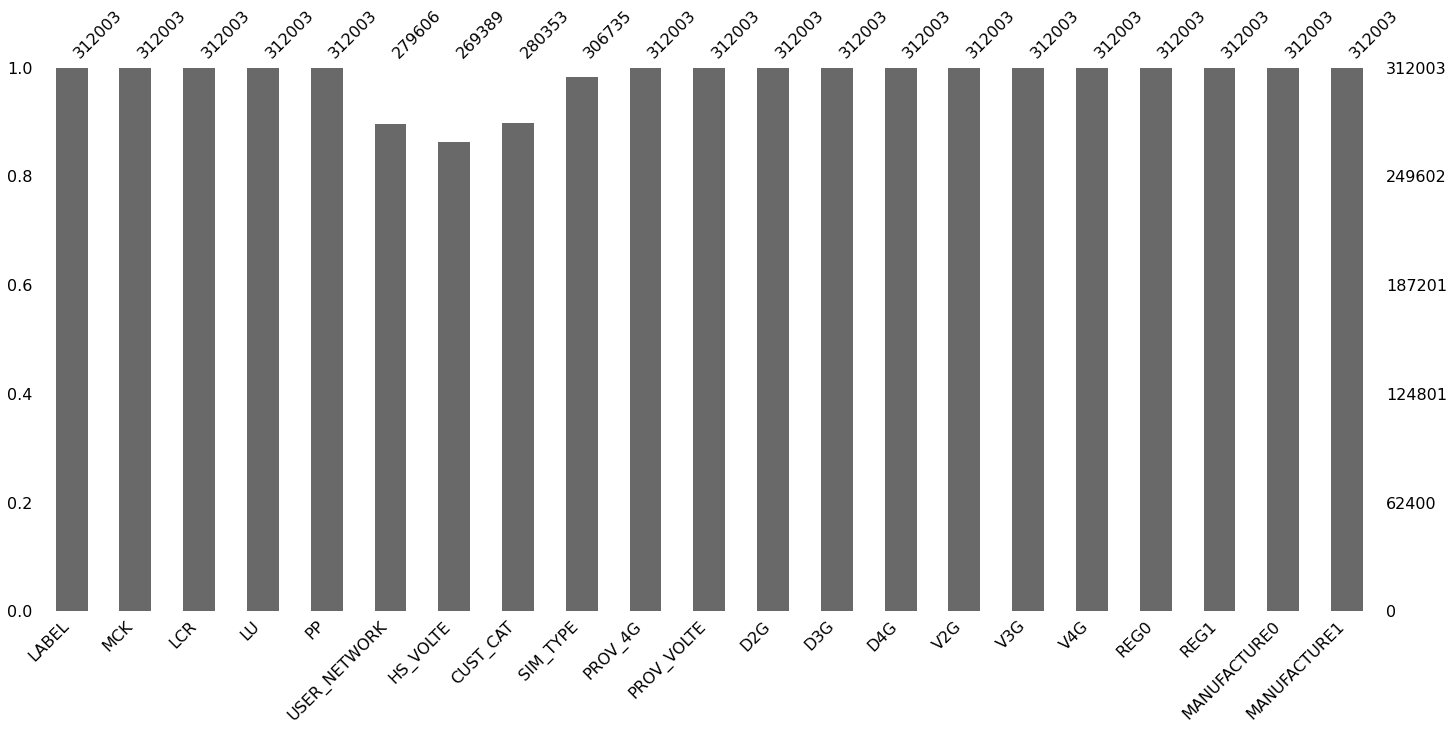

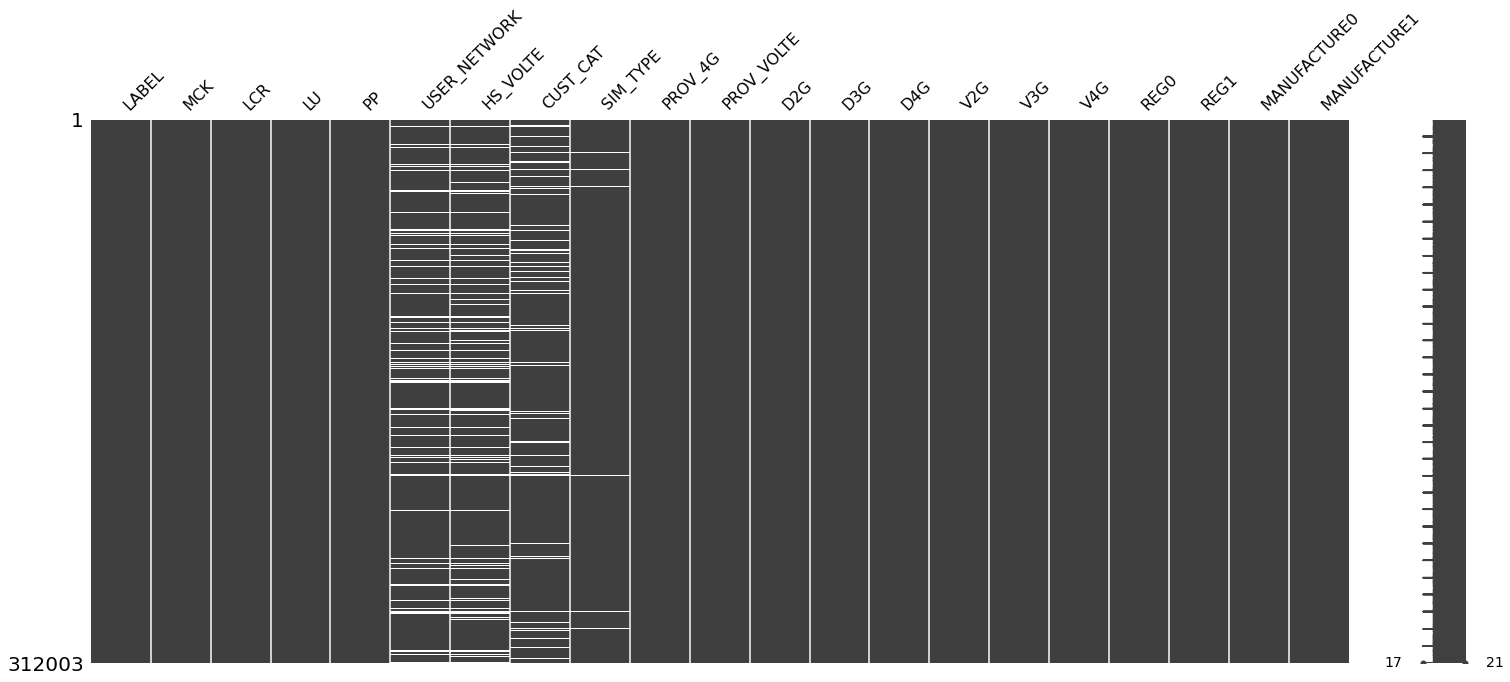

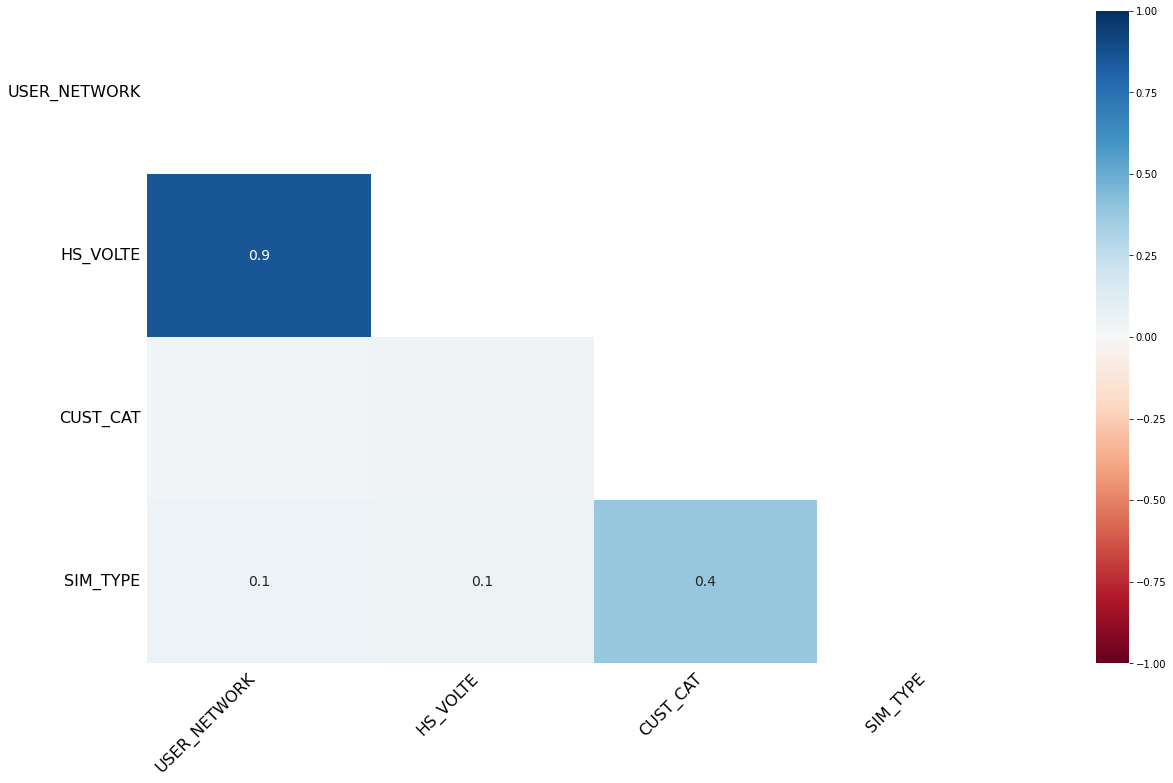

In [ ]:
# bar chart 
msno.bar(data)
# see missing data as a matrix 
msno.matrix(data)
# see correlation analysis using heatmap
msno.heatmap(data)


## potential mechnisms for the missing data
### at the start we suppose that all missing data mechnism is MAR until we prove it's not
### for USER_NETWORK , MANUFACTURE0,MANUFACTURE1  and HS_VOLTE columns we can see from heatmap that they have high correlation so they will be missing together so they will follow the same mechnism for the missing data and from msno.matrix(data) we can tell they are MNAR as they have certain pattern and because we can't decide the observer at which the values goes missing, for solving this i will use multiple imputer (knn imputer) but first i will convert them to numeric values using  encoding

## finally the rest columns (CUST_CAT,SIM_TYPE) have MCAR mechnism as they have no pattern and missing at random so I will use single imputer ( using most frequent strategy) for filling the missing data

In [ ]:
#first see the ratio of the missing data (how much is missing) using the following code 
our_total_missing_data=data.isnull().sum() #total missing data 
our_missing_data_percent=(our_total_missing_data/data.isnull().count()*100) # missing data percent
# lets display our_total_missing_data and our_missing_data_percent as dataframe and sort them
our_missing_values=pd.DataFrame({'our_total_missing_data':our_total_missing_data,'our_missing_data_percent':our_missing_data_percent}) #to show it as dataframe
our_missing_values.sort_values(by='our_total_missing_data',ascending=False) # to start with the most missing percent

,our_total_missing_data,our_missing_data_percent
HS_VOLTE,43232,13.826718
MANUFACTURE1,33015,10.559056
MANUFACTURE0,33015,10.559056
USER_NETWORK,33015,10.559056
CUST_CAT,31752,10.155116
SIM_TYPE,5301,1.695398
D4G,0,0.000000
REG1,0,0.000000
REG0,0,0.000000
V4G,0,0.000000


## I will check the values inside the 5 columns to make sure there is ant any other missing values other than nan as missing data can be written sometimes as  unkown -1 

In [ ]:
data['HS_VOLTE'].value_counts()

0    152043
1    117346
Name: HS_VOLTE, dtype: int64

In [ ]:
data['USER_NETWORK'].value_counts()

2    224584
0     36528
1     18494
Name: USER_NETWORK, dtype: int64

In [ ]:

data['MANUFACTURE0'].value_counts()

0.913738    47483
0.928635    32397
0.927096    28572
0.907435    27829
0.921421    20947
            ...  
0.757874        8
0.750151        8
0.999792        7
0.519730        4
0.246357        2
Name: MANUFACTURE0, Length: 124, dtype: int64

In [ ]:
data['SIM_TYPE'].value_counts()

1    275534
0     31201
Name: SIM_TYPE, dtype: int64

In [ ]:
data['CUST_CAT'].value_counts()

0    109256
2     96075
3     54646
1     11316
6      4989
5      3161
7       520
8       343
4        47
Name: CUST_CAT, dtype: int64

## First, I will handle the missing data of USER_NETWORK , MANUFACTURE0, MANUFACTURE1 and HS_VOLTE columns

<AxesSubplot:>

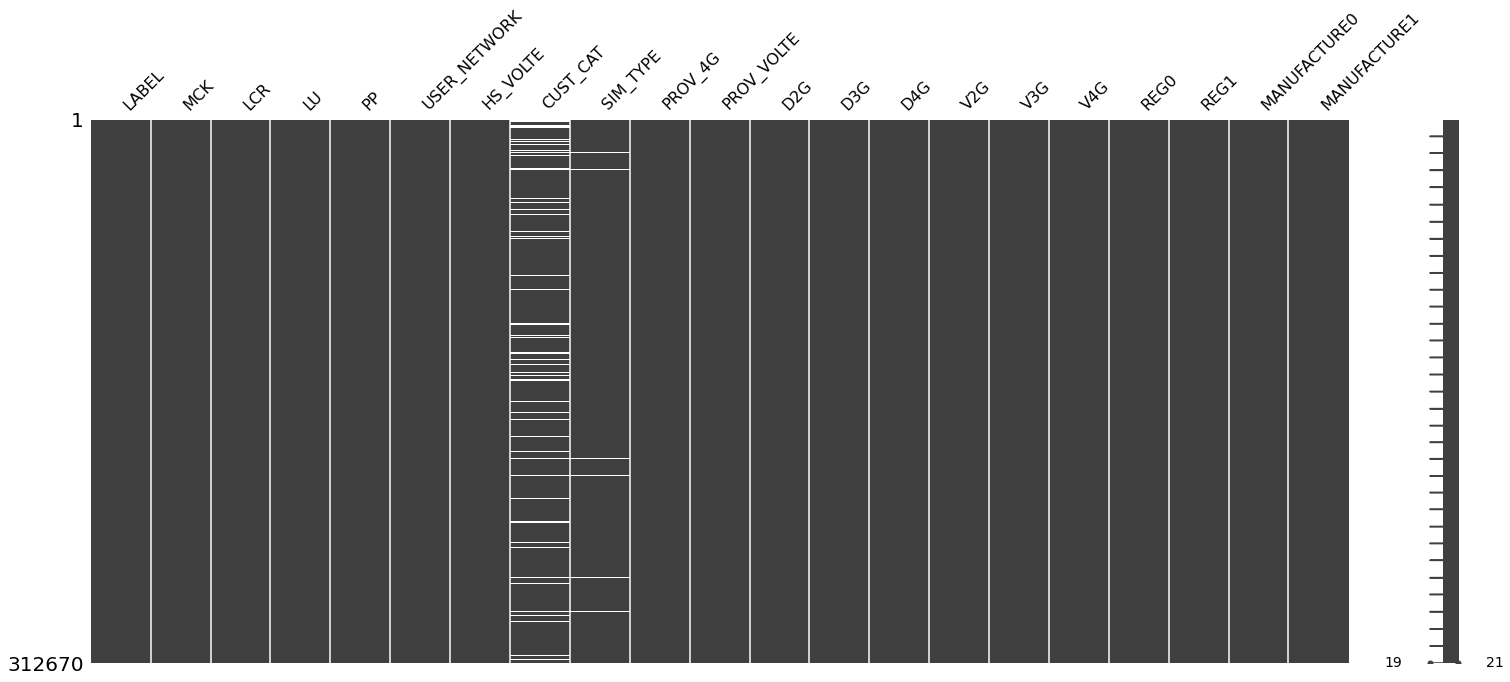

In [ ]:
# USER_NETWORK , MANUFACTURE and HS_VOLTE columns
from sklearn.impute import KNNImputer # to use multiple imputer
the_four_col=['USER_NETWORK','MANUFACTURE0','MANUFACTURE1','HS_VOLTE'] 
multiple_imputer_using_KNNImputer= KNNImputer(n_neighbors=2,weights="uniform") # define the knn imputer
the_four_col_after_imputer=multiple_imputer_using_KNNImputer.fit_transform(data[the_four_col]) #aplly the knnimputer 
data[the_four_col]=the_four_col_after_imputer #update the data with USER_NETWORK , MANUFACTURE0,MANUFACTURE1 and HS_VOLTE columns after filling them
msno.matrix(data) # see the data after filling the three columns

## handling the missing data in the rest columns (CUST_CAT,SIM_TYPE)

<AxesSubplot:>

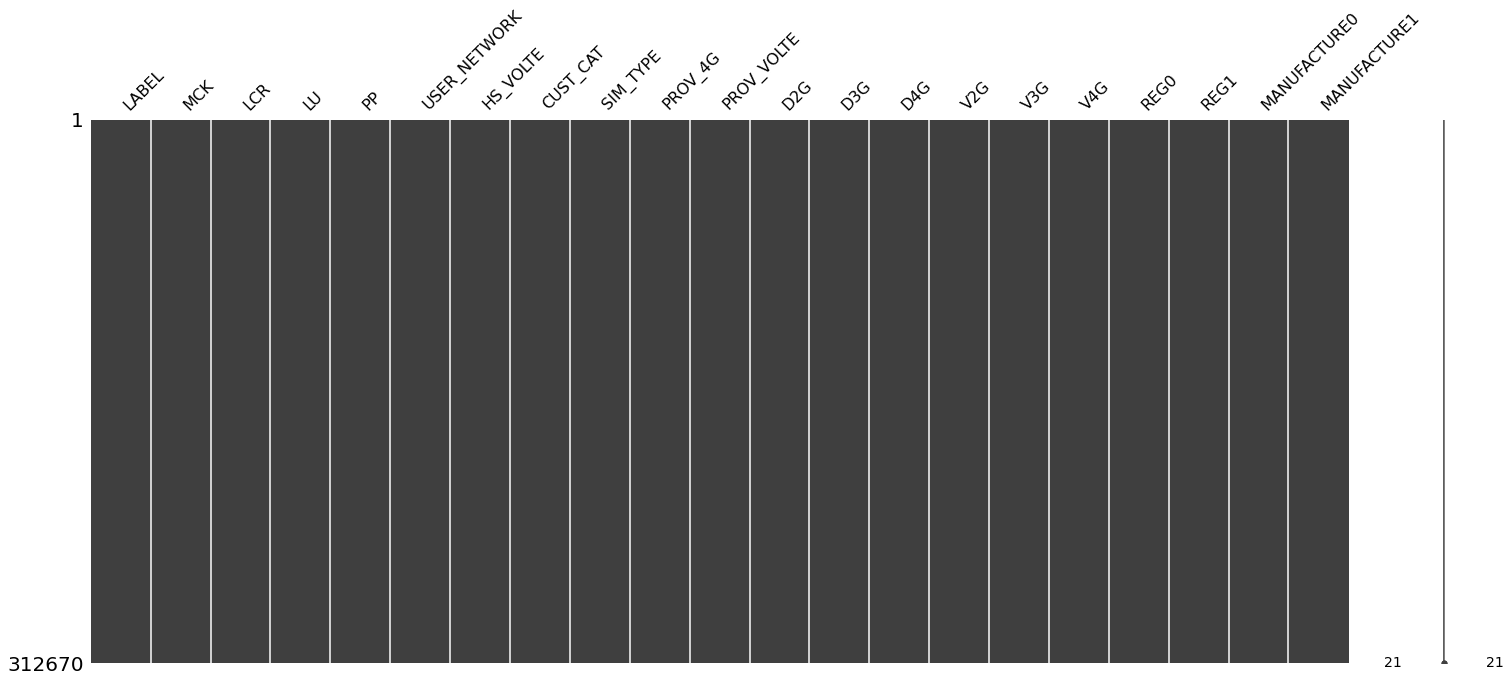

In [ ]:
from sklearn.impute import SimpleImputer #importanting SimpleImputer
our_SimpleImputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent') # define the SimpleImputer  with strategy of most_frequent
# fill the missing data
data=pd.DataFrame(our_SimpleImputer.fit_transform(data),index=data.index,columns=data.columns) # aplly the SimpleImputer
msno.matrix(data) # see the data after filling the missing values

In [ ]:
data.isna().sum() # see the the number of missing data in each column to make sure i filled all the missing data

LABEL           0
MCK             0
LCR             0
LU              0
PP              0
USER_NETWORK    0
HS_VOLTE        0
CUST_CAT        0
SIM_TYPE        0
PROV_4G         0
PROV_VOLTE      0
D2G             0
D3G             0
D4G             0
V2G             0
V3G             0
V4G             0
REG0            0
REG1            0
MANUFACTURE0    0
MANUFACTURE1    0
dtype: int64

#plot the outlier:



In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='D4G'>

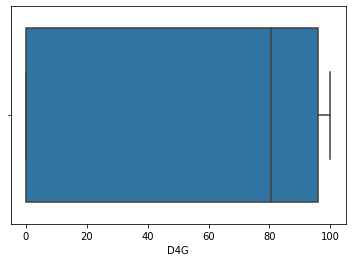

In [ ]:
sns.boxplot(data['D4G'])

<AxesSubplot:xlabel='D3G'>

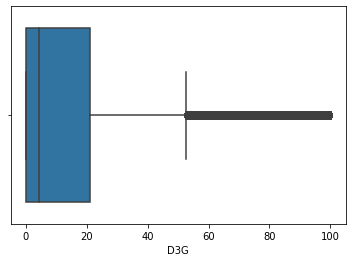

In [ ]:
sns.boxplot(data['D3G'])

<AxesSubplot:xlabel='D2G'>

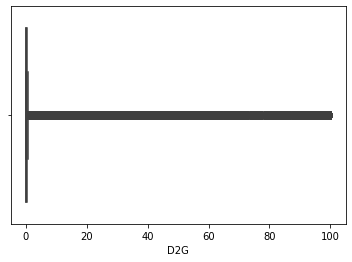

In [ ]:
sns.boxplot(data['D2G'])

<AxesSubplot:xlabel='V4G'>

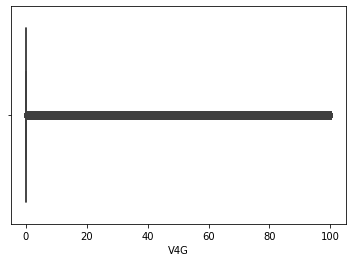

In [ ]:
sns.boxplot(data['V4G'])

<AxesSubplot:xlabel='V3G'>

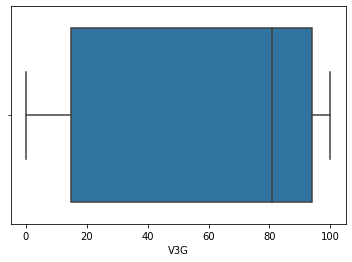

In [ ]:
sns.boxplot(data['V3G'])

<AxesSubplot:xlabel='V2G'>

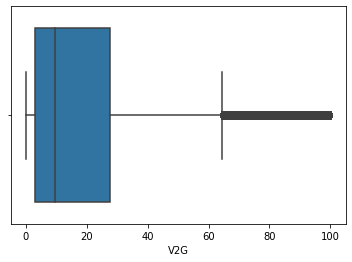

In [ ]:
sns.boxplot(data['V2G'])

<AxesSubplot:xlabel='MCK'>

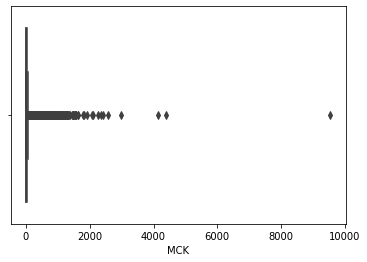

In [ ]:
sns.boxplot(data['MCK'])	

<AxesSubplot:xlabel='LCR'>

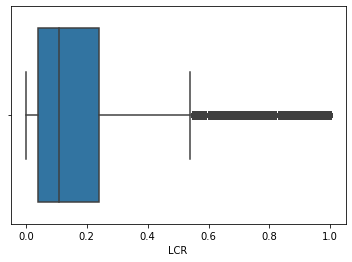

In [ ]:
sns.boxplot(data['LCR'])

<AxesSubplot:xlabel='LU'>

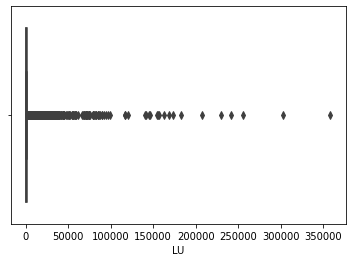

In [ ]:
sns.boxplot(data['LU'])

<AxesSubplot:xlabel='PP'>

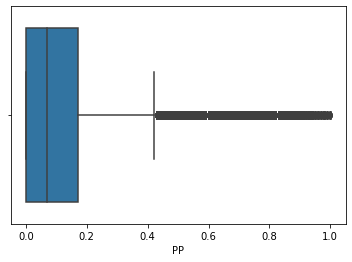

In [ ]:
sns.boxplot(data['PP'])

##Data Exploration

In [ ]:
# get the unique regions
data_exp.REG.unique()


array(['DELTA', 'UPPER EGYPT', 'ALEXANDRIA', 'CANAL', 'GIZA', 'CAIRO',
       'NEW CAPITAL'], dtype=object)

In [ ]:
# get the unique regions Manufacture
data_exp.MANUFACTURE.unique()

array(['Samsung', 'HMD Global Oy', 'Xiaomi Communications Co Ltd', nan,
       'INFINIX TECHNOLOGY LIMITED', 'Huawei Device Company Limited',
       'Samsung Korea',
       'Guangdong Oppo Mobile Telecommunications Corp Ltd', 'Apple',
       'Xiaomi', 'Microsoft Mobile Oy, Nokia Corporation', 'Apple Inc',
       'Oppo', 'HUAWEI Technologies Co Ltd', 'Tecno Telecom (HK) Limited',
       'realme', 'Huawei', 'Nokia Corporation', 'Itel',
       'Vivo Mobile Communication Co Ltd', 'Microsoft Mobile Oy', 'Honor',
       'Tecno', 'Nokia', 'Itel Technology Limited',
       'HK Darago Technology Co Limited', 'INFINIX',
       'OnePlus Technology (Shenzhen) Co Ltd',
       'Sony Mobile Communications',
       'Realme Chongqing Mobile Telecommunications Corp Ltd',
       'Realme Mobile Telecommunications (Shenzhen) Co Ltd', 'Motorola',
       'TCL Communication Ltd', 'Lava International Ltd',
       'Sico Technology Ltd', 'Blackberry', 'HTC Corporation', 'vivo',
       'Max Tel FZE', 'OnePlus',
 

##Figure out total percentage of Each Region (churners or non churners) and percentage of churners and non churners on the data

In [ ]:
g_labels = ['DELTA','CAIRO', 'UPPER EGYPT','GIZA','ALEXANDRIA',
       'CANAL','NEW CAPITAL']
c_labels = ['d', 'p']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data_exp['REG'].value_counts(), name="Region"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data_exp['LABEL'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="REGION der and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Region', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
fig = px.histogram(data_exp, x="LABEL", color="REG", barmode="group", title="<b>Customer REGION distribution<b>")
fig.show()

In [ ]:
# number of churners and non churners
data_exp['LABEL'].value_counts()

d    285803
p     26200
Name: LABEL, dtype: int64

In [ ]:
# put the data of churners in variable
churners=data_exp[data_exp["LABEL"]=="d"]


In [ ]:
# print the number of churners on each region 
churners['REG'].value_counts()

DELTA          118814
CAIRO           59338
UPPER EGYPT     36299
GIZA            28250
ALEXANDRIA      25662
CANAL           17239
NEW CAPITAL       201
Name: REG, dtype: int64

##Figure out the percentage of churners on each region and on each handset of users that support 4G , 3G ,2G

In [ ]:
g_labels = ['DELTA','CAIRO', 'UPPER EGYPT','GIZA','ALEXANDRIA',
       'CANAL','NEW CAPITAL']
c_labels = ['4G','2G', '3G']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=churners['REG'].value_counts(), name="Region"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=churners['USER_NETWORK'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="User_Network der and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Region', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

###41 % users from Delta churn the company
###20.8% users from cairo churn the company
###12.9% users from Upper Egypt churn the company
###9.84% users from Giza churn the company
###9.3% users from Alex churn the company
###6.09% users from chanal churn the company
###0.0727% users from chanal New Capital the company
### 81.1% users their handset support 4G and churn the company
### 12.5% users their handset support 4G and churn the company
### 6.36% users their handset support 4G and churn the company

In [ ]:
# number of people churn the company and has provesion to 4G
churners[['PROV_4G']].value_counts()

PROV_4G
Y          246562
N           39241
dtype: int64

##91.4% from people who are provesion 4G and VolTE by company (churn )

In [ ]:
churners[['PROV_VOLTE']].value_counts()

PROV_VOLTE
Y             246562
N              39241
dtype: int64

In [ ]:
## number of churners that their company support 4G
company_support_4G=churners[churners["PROV_4G"]=="Y" ]

In [ ]:
## number of churners that their company support 4G in each handset Network
company_support_4G[['USER_NETWORK']].value_counts()

USER_NETWORK
4G              188593
2G               20753
3G               11680
dtype: int64

In [ ]:
## number of churners that their company and handset support 4G
handset_support_4G=company_support_4G[company_support_4G['USER_NETWORK']=="4G"]

In [ ]:
Data_V4G=handset_support_4G[handset_support_4G["D4G"]<=50]
Voice_V4G=handset_support_4G[handset_support_4G["V4G"]<=50]

In [ ]:
Data_V4G["D4G"].value_counts().sum()

40323

##21% from churners the company and dataset provide the 4G and the percentage of the data < 50% 

In [ ]:
from _plotly_utils.colors import validate_colors_dict
Voice_V4G["V4G"].value_counts().sum()

148391

##78.683% from churners the company and dataset provide the 4G and the percentage of the data < 50% 

##Figure out Nunber of churners that has provision VoltE from company and hanset

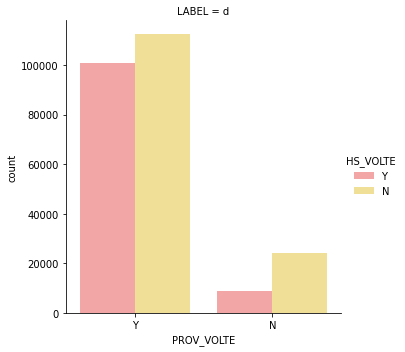

In [ ]:
Efc = sns.catplot(x="PROV_VOLTE", hue="HS_VOLTE", col="LABEL", 
                    data=churners, kind="count",
                    palette={"Y": "#FF9999", "N": "#FFE888"})

##Around 110000 from people has provestion volte from the company but dose not has handset that support volte which are  churers 

## distributions plots

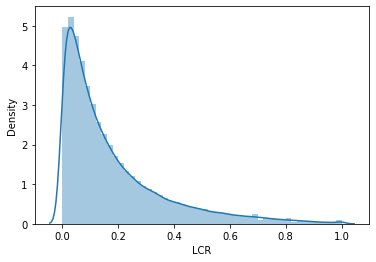

In [ ]:
#histogram of loss in coverage
sns.distplot(churners['LCR']);

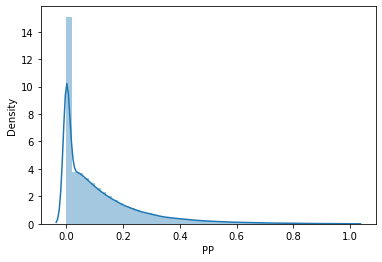

In [ ]:
#histogram of ping bong problem
sns.distplot(churners['PP']);

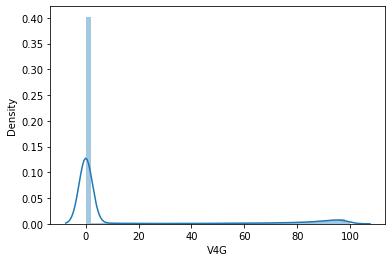

In [ ]:
#histogram of speed of the voice in 4G problem
sns.distplot(churners['V4G']);

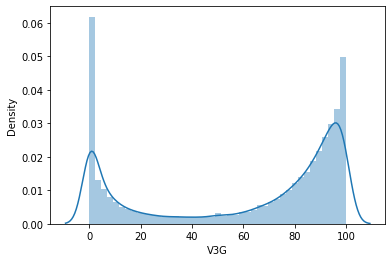

In [ ]:
#histogram of speed of the voice in 3G problem
sns.distplot(churners['V3G']);

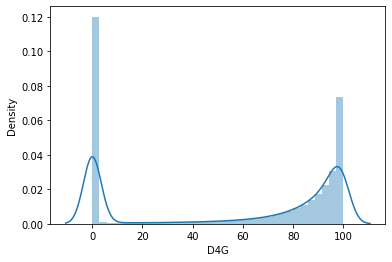

In [ ]:
#histogram of speed of the data in 4G problem
sns.distplot(churners['D4G']);

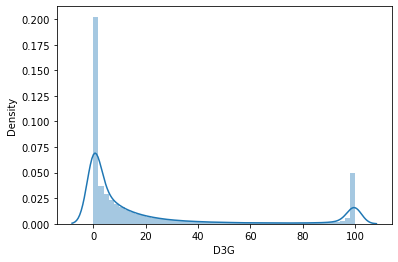

In [ ]:
#histogram of speed of the data in 3G problem
sns.distplot(churners['D3G']);

##Corroation Matrix

<AxesSubplot:>

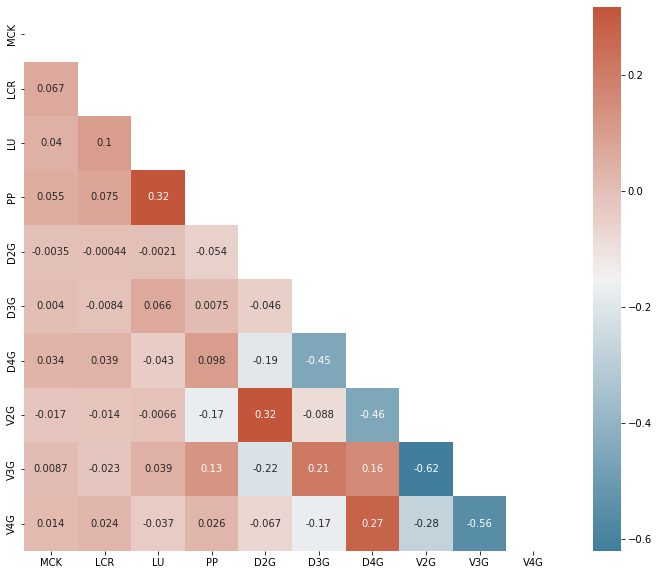

In [ ]:
# Generate a mask for upper traingle
#
# Correlation between different variables
#
corr = data_exp.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
sns.heatmap(data_exp.corr() , annot = True, mask = mask, cmap=cmap)

## features selection 
#### first let split the data were x is the i/p and y is the o/p

In [ ]:
Y=data['LABEL'].astype('int')
X = data.drop(['LABEL'], axis=1).astype('float')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=2)

In [ ]:
x_train_smote = X_train.copy()
y_train_smote = y_train.copy()

## upsampling


In [ ]:
print("Before OverSampling- counts of label '1': {}".format(sum(Y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(Y==0)))
print("*******************************************************************")
sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())
print('After OverSampling with SVMSMOTE- x_train: {}'.format(x_train_smote.shape))
print('After OverSampling with SVMSMOTE- y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SVMSMOTE- counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling with SVMSMOTE- counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling- counts of label '1': 26248
Before OverSampling- counts of label '0': 286422 

*******************************************************************
After OverSampling with SVMSMOTE- x_train: (429594, 20)
After OverSampling with SVMSMOTE- y_train: (429594,) 

After OverSampling with SVMSMOTE- counts of label '1': 214797
After OverSampling with SVMSMOTE- counts of label '0': 214797


## First Extra Tree Classifier for Feature Selection

In [ ]:
# Building the model
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators = 600,
criterion ='entropy', max_features = 6) #n_estimators The number of trees in the forest.
  
# Training the model
ETC.fit(x_train_smote, y_train_smote)
  
# Computing the importance of each feature
feature_importance = ETC.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        ETC.estimators_],
                                        axis = 0)

ExtraTreesClassifier(criterion='entropy', max_features=6, n_estimators=600)

<Figure size 576x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<BarContainer object of 20 artists>

Text(0.5, 0, 'Feature Labels')

Text(0, 0.5, 'Feature Importances')

Text(0.5, 1.0, 'Comparison of different Feature Importances')

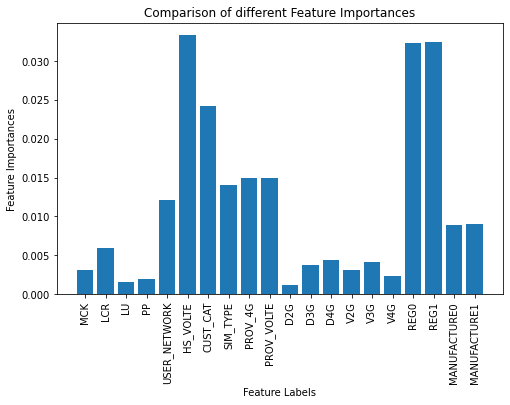

In [ ]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

## Other method for Extra Tree Classifier for Feature Selection

ExtraTreesClassifier()

[0.03796681 0.05506023 0.04279974 0.0319377  0.02816667 0.11201068
 0.06303049 0.02429567 0.0330135  0.02848842 0.01592502 0.03135712
 0.02845519 0.03447703 0.03544192 0.01186304 0.14302654 0.14911225
 0.04653203 0.04703994]


<AxesSubplot:>

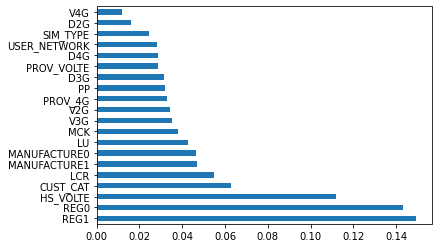

In [ ]:
#import libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = ExtraTreesClassifier()
model.fit(x_train_smote,y_train_smote)
print(model.feature_importances_)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

rf.fit(x_train_smote,y_train_smote)

RandomForestRegressor(random_state=0)

<BarContainer object of 20 artists>

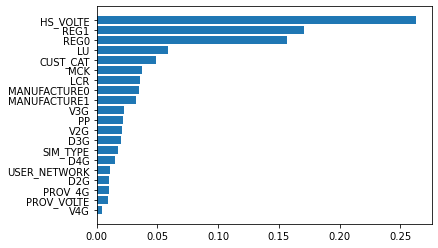

In [ ]:
f_i = list(zip(X,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

XGboost

In [ ]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.2


In [ ]:

# xgboost for feature importance on a classification problem
# define the model
model = XGBClassifier()
# fit the model
model.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<BarContainer object of 20 artists>

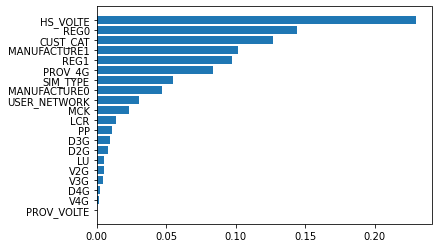

In [ ]:
f_i = list(zip(X,model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

# feature selection

In [ ]:
x_train_smote.drop(columns=['V4G',"PROV_VOLTE"], axis=1,inplace=True)
X_test.drop(columns=['V4G',"PROV_VOLTE"], axis=1,inplace=True)

In [ ]:
x_train_smote

,MCK,LCR,LU,PP,USER_NETWORK,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,D2G,D3G,D4G,V2G,V3G,REG0,REG1,MANUFACTURE0,MANUFACTURE1
0,2.000000,0.100000,446.000000,0.000000,0.00000,0.000000,6.000000,1.0,1.000000,0.00000,0.000000,0.000000,100.000000,0.000000,0.919763,0.080237,0.895361,0.104639
1,42.000000,0.450000,1391.000000,0.000000,2.00000,1.000000,3.000000,1.0,1.000000,0.04000,99.960000,0.000000,17.110000,82.890000,0.919763,0.080237,0.907435,0.092565
2,0.000000,0.060000,855.000000,0.100000,2.00000,0.000000,1.000000,1.0,1.000000,0.00000,0.000000,0.000000,7.140000,92.860000,0.912648,0.087352,0.909564,0.090436
3,2.000000,0.000000,77.000000,0.000000,2.00000,1.000000,2.000000,1.0,1.000000,0.00000,0.000000,0.000000,0.000000,100.000000,0.856230,0.143770,0.913738,0.086262
4,13.000000,0.140000,2718.000000,0.100000,2.00000,0.000000,3.000000,1.0,1.000000,0.11000,5.920000,93.970000,20.740000,79.260000,0.940157,0.059843,0.911536,0.088464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428827,0.000000,0.060000,622.829028,0.133368,2.00000,0.582903,1.668389,1.0,1.000000,9.18448,5.889328,84.926191,4.301606,95.698394,0.866764,0.133236,0.929260,0.070740
428828,0.000000,0.244807,931.000000,0.180725,2.00000,0.474853,1.575440,1.0,1.000000,0.00000,2.420700,97.579300,17.649681,82.350319,0.926978,0.073022,0.913656,0.086344
428829,0.000000,0.090418,406.347277,0.039373,0.00000,0.673638,2.020915,1.0,1.000000,0.00000,0.053891,99.946109,99.440880,0.559120,0.876964,0.123036,0.868340,0.131660
428830,0.872733,0.114667,1377.709089,0.171758,0.09697,0.024243,0.000000,1.0,0.048485,0.00000,0.000000,0.000000,99.331390,0.668610,0.920751,0.079249,0.896974,0.103026


In [ ]:
CV = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Using Neural Network

In [ ]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=64, input_dim=18, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='tanh'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 
# Optimizer== the algorithm of adam to keep updating weights
# loss== the loss function to measure the accuracy
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(x_train_smote,y_train_smote, batch_size=128 , epochs=100, verbose=1)

2022-10-31 05:05:10.667380: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.6375 - accuracy: 0.6388
Epoch 2/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.6283 - accuracy: 0.6497
Epoch 3/100
3357/3357 [==============================] - 10s 3ms/step - loss: 0.6228 - accuracy: 0.6559
Epoch 4/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.6172 - accuracy: 0.6610
Epoch 5/100
3357/3357 [==============================] - 10s 3ms/step - loss: 0.6066 - accuracy: 0.6714
Epoch 6/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.5877 - accuracy: 0.6862
Epoch 7/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.5757 - accuracy: 0.6933
Epoch 8/100
3357/3357 [==============================] - 10s 3ms/step - loss: 0.5709 - accuracy: 0.6964
Epoch 9/100
3357/3357 [==============================] - 11s 3ms/step - loss: 0.5680 - accuracy: 0.6978
Epoch 10/100
3357/3357 [==============================] - 11s 3m

In [ ]:
y_test_pred_ANN = classifier.predict(X_test)
test_acc_ANN = accuracy_score(y_test, y_test_pred_ANN.round())
test_acc_ANN

0.8581005014839832

In [ ]:
print(classification_report(y_test, y_test_pred_ANN.round()))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     71625
           1       0.19      0.21      0.20      6543

    accuracy                           0.86     78168
   macro avg       0.56      0.56      0.56     78168
weighted avg       0.87      0.86      0.86     78168



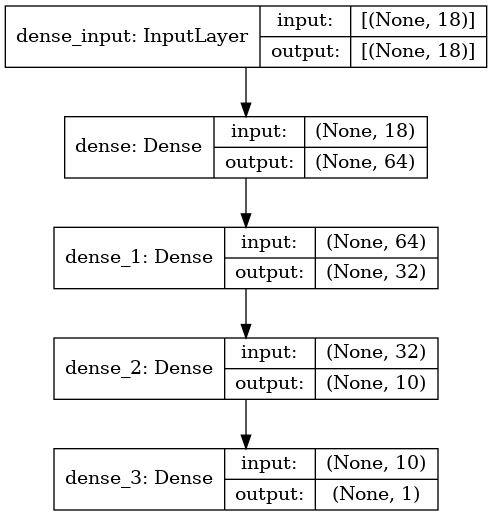

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

# Comparing between different Models

In [ ]:
-+DT = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=0)
cross_val_DT = cross_val_score(DT, x_train_smote, y_train_smote , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT,x_train_smote, y_train_smote , cv = CV, 
                                  scoring = 'f1') 
# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,min_samples_split=6, n_estimators=200, random_state=0)
cross_val_RF = cross_val_score(RF, x_train_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, x_train_smote, y_train_smote , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
ET = ExtraTreesClassifier(max_depth=4, min_samples_leaf=2,min_samples_split=6, 
                          n_estimators=200, random_state=0)
cross_val_ET = cross_val_score(ET, x_train_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_ET_f1 = cross_val_score(ET, x_train_smote, y_train_smote , cv = CV, 
                                  scoring = 'f1') 

C# --------------------------------------------------------------------------
MLP = MLPClassifier(activation='relu', hidden_layer_sizes=20, learning_rate_init=0.025, max_iter=100, random_state=0)
cross_val_MLP = cross_val_score(MLP, x_train_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_MLP_f1 = cross_val_score(MLP, x_train_smote, y_train_smote , cv = CV, 
                                   scoring = 'f1') 


In [ ]:

# --------------------------------------------------------------------------
GB = GradientBoostingClassifier(loss='exponential', max_depth=4, min_samples_leaf=4, random_state=0)
cross_val_GB = cross_val_score(GB, x_train_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_GB_f1 = cross_val_score(GB, x_train_smote, y_train_smote , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
LR = LogisticRegression(C=10, random_state=0, solver='newton-cg')
cross_val_LR = cross_val_score(LR, x_train_smote, y_train_smote ,cv = CV, scoring = 'accuracy') 
cross_val_LR_f1 = cross_val_score(LR, x_train_smote, y_train_smote ,cv = CV, 
                               scoring = 'f1') 

# ---- ----------------------------------------------------------------------
XGB = XGBClassifier(learning_rate_init= 0.1, max_depth= 6, n_estimators= 300, n_jobs=-1, random_state = 0,
                    min_child_weight= 1, colsample_bytree= 0.8, gamma= 0.5)
cross_val_XGB = cross_val_score(XGB, x_train_smote, y_train_smote ,cv = CV, scoring = 'accuracy') 
cross_val_XGB_f1 = cross_val_score(XGB, x_train_smote, y_train_smote ,cv = CV, 
                                   scoring = 'f1') 
# --------------------------------------------------------------------------
KNN = KNeighborsClassifier(n_neighbors=20)
cross_val_KNN = cross_val_score(KNN, x_train_smote, y_train_smote , cv = CV, 
                                scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, x_train_smote, y_train_smote , cv = CV, 
                                   scoring = 'f1') 

LGBM = LGBMClassifier(boosting_type='dart', learning_rate=0.2, max_depth=3, min_child_samples=10, 
                      num_leaves=5, random_state=0, reg_alpha=0.01)
cross_val_LGBM = cross_val_score(LGBM, x_train_smote, y_train_smote , cv = CV, 
                                 scoring = 'accuracy')
cross_val_LGBM_f1 = cross_val_score(LGBM, x_train_smote, y_train_smote , cv = CV, 
                                 scoring = 'f1')


[01:47:08] WARNING: ../src/learner.cc:627: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:49:41] WARNING: ../src/learner.cc:627: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:52:16] WARNING: ../src/learner.cc:627: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter 

In [ ]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean(),''),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean(), ''),
                  ('Neural Network', cross_val_MLP.mean(),cross_val_MLP_f1.mean(),''),
                  ('Extra Tree', cross_val_ET.mean(),cross_val_ET_f1.mean(), ''),
                  ('GradientBoosting', cross_val_GB.mean(),cross_val_GB_f1.mean(),''),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean(),''),
                 ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean(), ''),
                 ('XGBC', cross_val_XGB.mean(), cross_val_XGB_f1.mean(), 'The Best Model'),
                 ('LGBM', cross_val_LGBM.mean(), cross_val_LGBM_f1.mean(), '')]

In [ ]:
predict = pd.DataFrame(data = compare_models, columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)', 'Description'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score),Description
0,Decision Tree,0.912961,0.912643,
1,Random Forest,0.949778,0.947346,
2,Neural Network,0.546135,0.246015,
3,Extra Tree,0.724750,0.718182,
4,GradientBoosting,0.936532,0.932661,
5,Logistic Regression,0.653312,0.661752,
6,KNN,0.765899,0.792606,
7,XGBC,0.953348,0.951168,The Best Model
8,LGBM,0.914095,0.907896,


# training the best Model(XGBoost)

In [ ]:
XGB.fit(x_train_smote, y_train_smote)

[04:46:44] WARNING: ../src/learner.cc:627: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, learning_rate_init=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
#test the Model
y_test_pred_XGB = XGB.predict(X_test)
test_acc_XGB = accuracy_score(y_test, y_test_pred_XGB)

In [ ]:
test_acc_XGB

0.9144369943975077

In [ ]:
#get f1 score
test_f1_XGB = f1_score(y_test, y_test_pred_XGB, average="macro")

In [ ]:
test_f1_XGB

0.4874745118883769

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test,y_test_pred_XGB)

print(auc_score1)

0.5041754959081982


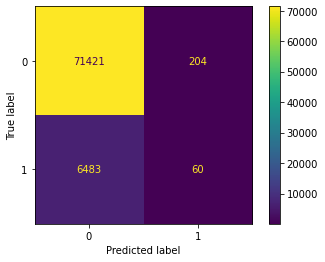

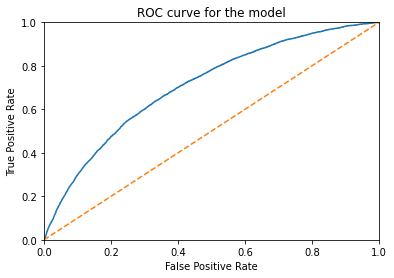

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
# Compute ROC curve and ROC area for each class
# print confusion matix + roc auc curve
def cm_roc_auc_curve(model, X_test, y_test):
    
    '''
    Takes:
    - the specific model run by the GrdSearchCV
    - features_test
    - target_test
    - the roc auc predictions
    - the set of models, updated
    - the set of models' names, updated
    Adds to the models set:
    - the values of the confusion matrix (TP, TN, FP, FN)
    Displays:
    - the models set in its current stage (including all the model so far) with their scores and confusion matrix values
    - a heatmap of the confusion matrix
    - the roc curve of the current model
    
    '''
    probabilities_one_valid = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
    
    # plot confusion matrix
    plot_confusion_matrix(model,X_test,y_test)
    
    # roc auc curve
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for the model')
    plt.show()
cm_roc_auc_curve(XGB, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_test_pred_XGB.round()))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     71387
           1       0.35      0.01      0.02      6614

    accuracy                           0.91     78001
   macro avg       0.63      0.50      0.49     78001
weighted avg       0.87      0.91      0.88     78001



# hyper parameter Tuning of XGboost 

In [ ]:
# A parameter grid for XGBoost
params = {
        'reg_lamda': [0.01, 0.05, 0.001],
        'gamma': [ .5, 1, 1,5],
        'learning_rate': [0.2,0,1,0.5],
        'max_depth': [ 4, 5,6,7,8],
        "scale_pos_weight":[2,3,5]
        }

In [ ]:
XGB1 =  XGBClassifier(n_jobs=-1, random_state = 0,min_child_weight= 1, colsample_bytree= 0.8,
                    silent=True, nthread=1,verbose=True)

In [ ]:
# using random search .
random_search = RandomizedSearchCV(XGB1 ,params, scoring="accuracy" , n_jobs=4, cv=CV, verbose=3, refit="recall")

# Here we go
result=random_search.fit(x_train_smote, y_train_smote
                 ,verbose=True,early_stopping_rounds=20,eval_set=[(X_test,y_test)],eval_metric="aucpr")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[06:06:42] WARNING: ../src/learner.cc:627: 
Parameters: { "reg_lamda", "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.11025
[06:06:43] WARNING: ../src/learner.cc:627: 
Parameters: { "reg_lamda", "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.11149
[06:06:43] WARNING: ../src/learner.cc:627: 
Parameters: { "reg_lamda", "silent", "verbose" } might not be used.

  

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9487935118391638
Best Hyperparameters: {'scale_pos_weight': 2, 'reg_lamda': 0.001, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.5}


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/p

[CV 2/5] END gamma=5, learning_rate=1, max_depth=6, reg_lamda=0.05, scale_pos_weight=2;, score=0.941 total time= 1.2min


In [ ]:
XGB1 = XGBClassifier(  gamma= 0.5,  learning_rate= 0.2,  max_depth=7, reg_lamda=0.001, scale_pos_weight=2, n_estimators= 200,colsample_byree= 0.8, objective='binary:logistic',nthread=1)

In [ ]:
XGB1.fit(x_train_smote, y_train_smote
                 ,verbose=True)

[07:13:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_byree", "reg_lamda" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_byree=0.8,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=0, ...)

In [ ]:
y_test_pred_XGB1 = XGB1.predict(X_test)
test_acc_XGB1 = accuracy_score(y_test, y_test_pred_XGB1.round())
test_acc_XGB1

0.907762767372838

In [ ]:
test_f1_XGB1 = f1_score(y_test, y_test_pred_XGB1.round(), average="macro")
test_f1_XGB1

0.5289693591498892

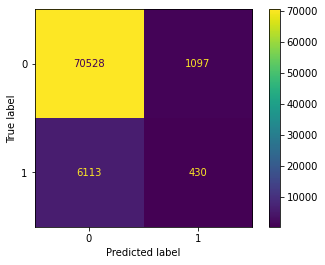

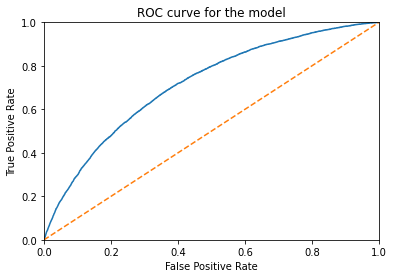

In [ ]:
cm_roc_auc_curve(XGB1, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_test_pred_XGB1.round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     71625
           1       0.28      0.07      0.11      6543

    accuracy                           0.91     78168
   macro avg       0.60      0.53      0.53     78168
weighted avg       0.87      0.91      0.88     78168



In [ ]:
# Add output to the test input
output = X_test.copy()
output['Predictions - Churn or Not'] = y_test_pred_XGB
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Churn'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Non_Churn'
output.head()

,MCK,LCR,LU,PP,USER_NETWORK,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,D2G,D3G,D4G,V2G,V3G,REG0,REG1,MANUFACTURE0,MANUFACTURE1,Predictions - Churn or Not,Predictions - Churn or Not Desc
MOB_NUM_,,,,,,,,,,,,,,,,,,,,
1075_409706_04_22,7.0,0.47,503.0,0.12,1.0,0.0,0.0,1.0,0.0,23.06,76.94,0.00,78.95,21.05,0.919793,0.080207,0.927102,0.072898,0,Churn
1038_368397_07_21,3.0,0.31,304.0,0.19,2.0,0.0,2.0,1.0,1.0,7.87,1.25,90.88,16.59,83.41,0.919793,0.080207,0.921424,0.078576,0,Churn
1108_107613_09_21,8.0,0.31,1262.0,0.15,2.0,0.0,0.0,1.0,1.0,0.00,1.13,98.87,7.52,92.48,0.856298,0.143702,0.921424,0.078576,0,Churn
1019_199815_07_22,23.0,0.31,744.0,0.20,2.0,1.0,2.0,1.0,1.0,8.78,21.40,69.82,11.47,34.86,0.940171,0.059829,0.967780,0.032220,0,Churn
1043_776714_09_21,2.0,0.22,834.0,0.20,2.0,0.0,0.0,0.0,1.0,0.00,92.80,7.20,37.50,62.50,0.919793,0.080207,0.921424,0.078576,0,Churn


In [ ]:
output

,MCK,LCR,LU,PP,USER_NETWORK,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,D2G,D3G,D4G,V2G,V3G,REG0,REG1,MANUFACTURE0,MANUFACTURE1,Predictions - Churn or Not,Predictions - Churn or Not Desc
MOB_NUM_,,,,,,,,,,,,,,,,,,,,
1075_409706_04_22,7.0,0.47,503.0,0.12,1.0,0.0,0.0,1.0,0.0,23.06,76.94,0.00,78.95,21.05,0.919793,0.080207,0.927102,0.072898,0,Churn
1038_368397_07_21,3.0,0.31,304.0,0.19,2.0,0.0,2.0,1.0,1.0,7.87,1.25,90.88,16.59,83.41,0.919793,0.080207,0.921424,0.078576,0,Churn
1108_107613_09_21,8.0,0.31,1262.0,0.15,2.0,0.0,0.0,1.0,1.0,0.00,1.13,98.87,7.52,92.48,0.856298,0.143702,0.921424,0.078576,0,Churn
1019_199815_07_22,23.0,0.31,744.0,0.20,2.0,1.0,2.0,1.0,1.0,8.78,21.40,69.82,11.47,34.86,0.940171,0.059829,0.967780,0.032220,0,Churn
1043_776714_09_21,2.0,0.22,834.0,0.20,2.0,0.0,0.0,0.0,1.0,0.00,92.80,7.20,37.50,62.50,0.919793,0.080207,0.921424,0.078576,0,Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032_995646_06_21,7.0,0.00,1063.0,0.71,2.0,0.0,2.0,1.0,1.0,0.00,4.08,95.92,2.77,97.23,0.940171,0.059829,0.907435,0.092565,0,Churn
1031_692154_06_21,0.0,0.18,1499.0,0.33,2.0,0.0,2.0,1.0,1.0,0.00,6.07,93.93,25.61,74.39,0.940171,0.059829,0.907435,0.092565,0,Churn
1029_598129_01_22,0.0,0.01,311.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.00,0.856298,0.143702,0.844122,0.155878,0,Churn


In [ ]:
# put the output to the original dataset
churns = pd.merge(data_exp, output, left_on = ["MOB_NUM_"] ,right_on = ['MOB_NUM_'], how='right')

In [ ]:
churns.drop( columns=["REG0","REG1","MCK_y","LCR_y","LU_y","USER_NETWORK_y","HS_VOLTE_y","CUST_CAT_y","D2G_y","D3G_y","D4G_y","V2G_y","V3G_y","MANUFACTURE0","MANUFACTURE1"
,"SIM_TYPE_y","PROV_4G_y","LABEL"],inplace=True)

In [ ]:
churns

,REG,MCK_x,LCR_x,LU_x,PP_x,USER_NETWORK_x,MANUFACTURE,HS_VOLTE_x,CUST_CAT_x,SIM_TYPE_x,...,PROV_VOLTE,D2G_x,D3G_x,D4G_x,V2G_x,V3G_x,V4G,PP_y,Predictions - Churn or Not,Predictions - Churn or Not Desc
MOB_NUM_,,,,,,,,,,,,,,,,,,,,,
1075_409706_04_22,DELTA,7.0,0.47,503.0,0.12,3G,Samsung,N,Core,Y,...,N,23.06,76.94,0.00,78.95,21.05,0.00,0.12,0,Churn
1038_368397_07_21,DELTA,3.0,0.31,304.0,0.19,4G,HUAWEI Technologies Co Ltd,N,Med-High,Y,...,Y,7.87,1.25,90.88,16.59,83.41,0.00,0.19,0,Churn
1108_107613_09_21,UPPER EGYPT,8.0,0.31,1262.0,0.15,4G,HUAWEI Technologies Co Ltd,N,Core,Y,...,Y,0.00,1.13,98.87,7.52,92.48,0.00,0.15,0,Churn
1019_199815_07_22,CAIRO,23.0,0.31,744.0,0.20,4G,Apple,Y,Med-High,Y,...,Y,8.78,21.40,69.82,11.47,34.86,53.67,0.20,0,Churn
1043_776714_09_21,DELTA,2.0,0.22,834.0,0.20,4G,HUAWEI Technologies Co Ltd,N,NaN,N,...,Y,0.00,92.80,7.20,37.50,62.50,0.00,0.20,0,Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032_995646_06_21,CAIRO,7.0,0.00,1063.0,0.71,4G,Guangdong Oppo Mobile Telecommunications Corp Ltd,N,Med-High,Y,...,Y,0.00,4.08,95.92,2.77,97.23,0.00,0.71,0,Churn
1031_692154_06_21,CAIRO,0.0,0.18,1499.0,0.33,4G,Guangdong Oppo Mobile Telecommunications Corp Ltd,N,Med-High,Y,...,Y,0.00,6.07,93.93,25.61,74.39,0.00,0.33,0,Churn
1029_598129_01_22,UPPER EGYPT,0.0,0.01,311.0,0.02,2G,Itel Technology Limited,N,Core,N,...,N,0.00,0.00,0.00,100.00,0.00,0.00,0.02,0,Churn


In [ ]:
churns.columns = churns.columns.str.replace('_x', '')

In [ ]:
import os
#craate csv file to the final output
churns.to_csv('Churn Predictions Output')
os. getcwd() 

'/kaggle/working'

In [ ]:
X=pd.read_csv("Churn Predictions Output")

In [ ]:
X

In [ ]:
#from google.colab import files

In [ ]:
os.chdir(r'./')

In [ ]:
#Download the file
from IPython.display import FileLink
FileLink(r'Churn Predictions Output')

/kaggle/working/Churn Predictions Output